# Redes Neurais
Redes Neurais são um tipo de modelo computacional inspirado no funcionamento do cérebro humano. Elas são usadas no campo do aprendizado de máquina e inteligência artificial para resolver uma variedade de problemas complexos de processamento de informações, como reconhecimento de padrões, classificação, regressão, processamento de linguagem natural e muito mais.

O conceito básico por trás das redes neurais é simular o comportamento dos neurônios no cérebro humano. Cada neurônio artificial (também conhecido como perceptron) em uma rede neural é uma unidade de processamento que recebe entradas, realiza um cálculo e produz uma saída. Essas saídas podem ser passadas como entradas para outros neurônios, formando uma rede de conexões.

As redes neurais são compostas por várias camadas de neurônios, que são organizadas em uma arquitetura de camadas. As camadas podem ser divididas em três tipos principais:

1. Camada de Entrada (Input Layer): Esta é a camada onde os dados de entrada são inseridos na rede neural. Cada neurônio nesta camada representa uma característica específica dos dados.

2. Camadas Ocultas (Hidden Layers): Estas são as camadas intermediárias entre a camada de entrada e a camada de saída. Cada neurônio em uma camada oculta recebe as saídas da camada anterior como entradas e realiza uma operação matemática para produzir sua própria saída.

3. Camada de Saída (Output Layer): Esta é a camada final da rede neural, onde as saídas finais do modelo são obtidas. A quantidade de neurônios na camada de saída depende do tipo de problema que está sendo resolvido (por exemplo, classificação binária, classificação multiclasse, regressão).

O processo de treinamento de uma rede neural envolve o ajuste dos pesos e viés (parâmetros) dos neurônios para que a rede possa aprender a mapear corretamente as entradas para as saídas esperadas. O treinamento normalmente é realizado usando um algoritmo de otimização que minimiza uma função de perda (ou custo), que mede o quão distantes as previsões da rede estão dos valores corretos. Durante o treinamento, a rede ajusta os parâmetros gradualmente para melhorar seu desempenho até que a função de perda seja minimizada.

As redes neurais podem ser extremamente poderosas para resolver problemas complexos e realizar tarefas de alto nível, como reconhecimento de fala, visão computacional, jogos de estratégia, tradução automática, entre outros. Com o avanço da computação e o aumento do volume de dados disponíveis, as redes neurais têm se tornado cada vez mais populares e são amplamente utilizadas em diversos domínios de aplicação. No entanto, elas também podem ser mais suscetíveis a problemas de overfitting e requerem um maior poder computacional e quantidade de dados de treinamento em comparação com outros algoritmos de aprendizado de máquina mais simples.

## Exemplo de Classificação com Redes Neurais usando o Conjunto de Dados "Wine"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2/2 [==============================] - 0s 10ms/step - loss: 0.1417 - accuracy: 0.9259
Acurácia do modelo: 0.93


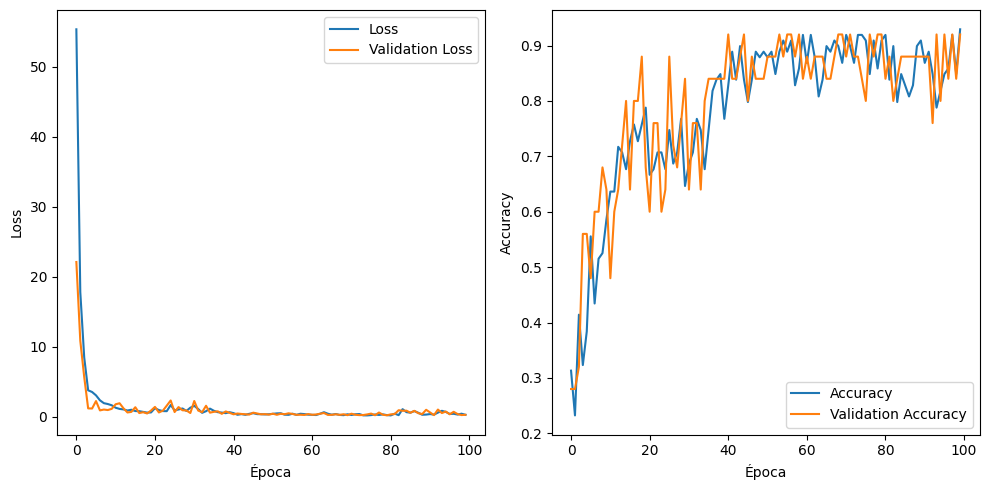

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History

# Carregando o conjunto de dados "Wine"
data = load_wine()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separando os recursos (X) e os rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando a codificação One-Hot para os rótulos (necessário para classificação multiclasse)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Avaliando o desempenho do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Plotando o gráfico de treinamento e precisão ao longo do tempo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Neste exemplo, utilizamos o conjunto de dados "Wine" para criar uma rede neural com duas camadas ocultas (com 16 e 8 neurônios, respectivamente) e uma camada de saída com 3 neurônios, representando as três classes de vinhos. A rede neural é treinada usando o otimizador Adam e a função de perda "categorical_crossentropy" para lidar com a classificação multiclasse.

Após o treinamento, avaliamos o desempenho do modelo usando o conjunto de teste e plotamos dois gráficos: um para visualizar a perda (loss) e a perda de validação (validation loss) ao longo das épocas de treinamento, e outro para visualizar a precisão (accuracy) e a precisão de validação (validation accuracy) ao longo do tempo.

Os gráficos nos mostram como a perda diminui e a precisão aumenta ao longo do treinamento, indicando que o modelo está aprendendo e melhorando suas previsões ao longo do tempo. Isso sugere que a rede neural está se ajustando bem ao conjunto de dados "Wine" e é capaz de classificar os vinhos com uma boa precisão.

## Exemplo de Classificação com Redes Neurais usando o Conjunto de Dados Iris

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2/2 [==============================] - 0s 7ms/step - loss: 0.0568 - accuracy: 1.0000
Acurácia do modelo: 1.00


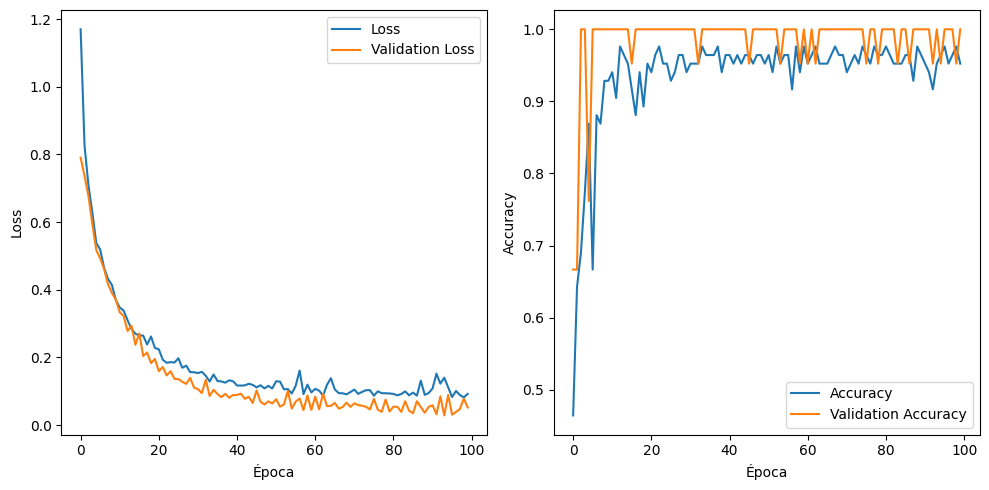

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History

# Carregando o conjunto de dados "Iris"
data = load_iris()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separando os recursos (X) e os rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando a codificação One-Hot para os rótulos (necessário para classificação multiclasse)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Avaliando o desempenho do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Plotando o gráfico de treinamento e precisão ao longo do tempo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Neste exemplo, criamos uma rede neural simples com uma camada oculta de 8 neurônios e uma camada de saída com 3 neurônios (um para cada classe do conjunto de dados "Iris"). A rede neural é treinada usando o otimizador Adam e a função de perda "categorical_crossentropy" para lidar com a classificação multiclasse.

Após o treinamento, avaliamos o desempenho do modelo usando o conjunto de teste e plotamos dois gráficos: um para visualizar a perda (loss) e a perda de validação (validation loss) ao longo das épocas de treinamento, e outro para visualizar a precisão (accuracy) e a precisão de validação (validation accuracy) ao longo do tempo.

Os gráficos nos mostram como a perda diminui e a precisão aumenta ao longo do treinamento, o que indica que o modelo está aprendendo e melhorando suas previsões ao longo do tempo. Isso é um bom indicativo de que a rede neural está se ajustando bem ao conjunto de dados e é capaz de realizar uma boa classificação. É importante destacar que a escolha da arquitetura da rede e dos hiperparâmetros pode variar dependendo do problema e pode ser otimizada para obter melhores resultados em problemas específicos.

## Exemplo de Classificação com Redes Neurais usando o Conjunto de Dados "Digits"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


17/17 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.9685
Acurácia do modelo: 0.97


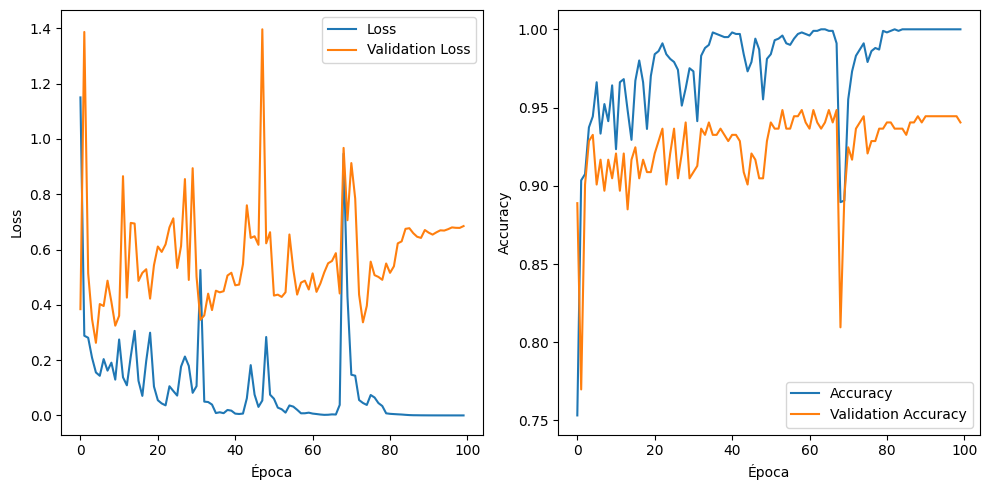

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History

# Carregando o conjunto de dados "Digits"
data = load_digits()

# Separando os recursos (X) e os rótulos (y)
X = data.data
y = data.target

# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando a codificação One-Hot para os rótulos (necessário para classificação multiclasse)
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Dense(128, input_dim=64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Avaliando o desempenho do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Plotando o gráfico de treinamento e precisão ao longo do tempo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Neste exemplo, utilizamos o conjunto de dados "Digits" para criar uma rede neural com duas camadas ocultas (com 128 e 64 neurônios, respectivamente) e uma camada de saída com 10 neurônios, representando os dígitos de 0 a 9. A rede neural é treinada usando o otimizador Adam e a função de perda "categorical_crossentropy" para lidar com a classificação multiclasse.

Após o treinamento, avaliamos o desempenho do modelo usando o conjunto de teste e plotamos dois gráficos: um para visualizar a perda (loss) e a perda de validação (validation loss) ao longo das épocas de treinamento, e outro para visualizar a precisão (accuracy) e a precisão de validação (validation accuracy) ao longo do tempo.

Os gráficos nos mostram como a perda diminui e a precisão aumenta ao longo do treinamento, o que indica que o modelo está aprendendo e melhorando suas previsões ao longo do tempo. Isso sugere que a rede neural está se ajustando bem ao conjunto de dados "Digits" e é capaz de classificar os dígitos escritos à mão com uma boa precisão.